# Propensity Score Matching

In [31]:
#Import basic libariaries
%matplotlib inline
import math
import numpy as np
import scipy
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

Data from: 
"Propensity Score Matching Methods for Non-Experimental Causal Studies," Review of Economics and Statistics, Vol. 84, (February 2002), pp. 151-161.
Goal: Find the effect of training on Earnings

The variables from left to right are: treatment indicator (1 if treated, 0 if not treated), age, education, Black (1 if black, 0 otherwise), Hispanic (1 if Hispanic, 0 otherwise), married (1 if married, 0 otherwise), nodegree (1 if no degree, 0 otherwise), RE74 (earnings in 1974), RE75 (earnings in 1975), and RE78 (earnings in 1978).

In [3]:
#Load the data
names = ['Treated', 'Age', 'Education', 'Black', 'Hispanic', 'Married',
         'Nodegree', 'RE74', 'RE75', 'RE78']
treated = pd.read_table('nswre74_treated.txt', sep = '\s+',
                        header = None, names = names)
control = pd.read_table('nswre74_control.txt', sep='\s+', 
                        header = None, names = names)
data = pd.concat([treated, control])
data.head()

,Treated,Age,Education,Black,Hispanic,Married,Nodegree,RE74,RE75,RE78
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.0460
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.8940
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.4500
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.1460
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.7899


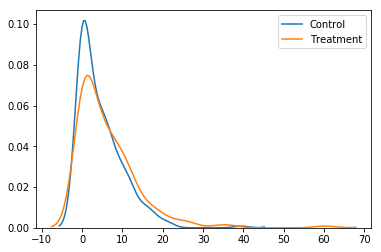

In [36]:
data[['RE74_div', 'RE75_div', 'RE78_div']] = data[['RE74', 'RE75', 'RE78']] / 1000


sns.kdeplot(data[data.Treated == 0].RE78_div, label='Control')
sns.kdeplot(data[data.Treated == 1].RE78_div, label='Treatment')

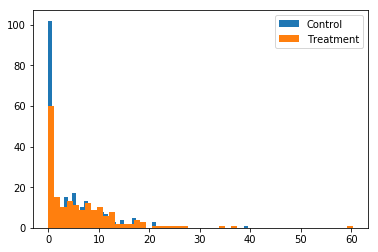

In [38]:
plt.hist(data[data.Treated == 0].RE78_div, label='Control', bins=50);
plt.hist(data[data.Treated == 1].RE78_div, label='Treatment', bins=50);
plt.legend();

In [40]:
from causalinference import CausalModel

In [41]:
causal_model = CausalModel(
    X=data[['Age', 'Education', 'Black', 'Hispanic', 'Married','Nodegree', 'RE74_div', 'RE75_div']].values,
    D=data.Treated.values,
    Y=data.RE78_div.values
)
causal_model.est_propensity()
causal_model.trim_s()
causal_model.stratify_s()
causal_model.est_via_ols()
causal_model.est_via_matching(bias_adj=True)
causal_model.est_via_weighting()

print(causal_model.summary_stats)
print(causal_model.estimates)
print(causal_model.propensity)
print(causal_model.strata)


Summary Statistics

                       Controls (N_c=260)         Treated (N_t=185)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        4.555        5.484        6.349        7.867        1.794

                       Controls (N_c=260)         Treated (N_t=185)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       25.054        7.058       25.816        7.155        0.107
             X1       10.088        1.614       10.346        2.011        0.141
             X2        0.827        0.379        0.843        0.365        0.044
             X3        0.108        0.311        0.059        0.237       -0.175
             X4        0.154        0.361        0.189        0.393        0.094
      

# Regression discontinuity 